**Pneumonia Detection using Deep Learning**

This Deep Learning Projects that focuses on pneumonia detection using deep learning techniques. Pneumonia is a severe respiratory condition that affects the lungs, and early detection is crucial for effective treatment.

The dataset, which consists of chest X-ray images labeled as either positive or negative for pneumonia.

Tools and Technologies:

**VGG16**: It is an easy and broadly used Convolutional Neural Network (CNN) Architecture used for ImageNet which is a huge visible database mission utilized in visual object recognition software research.

**Transfer learning (TL)**: It is a technique in deep learning that focuses on taking a pre-trained neural network and storing knowledge gained while solving one problem and applying it to new different datasets. In this article, knowledge gained while learning to recognize 1000 different classes in ImageNet could apply when trying to recognize the disease.

```
[Chest X-Ray Dataset]
   ↓
[Preprocessing Images]
   ↓
[Split Dataset]
   ├──► [Training Set]
   └──► [Testing Set]
   ↓
[Build CNN Model: VGG16]
   ↓
[Convolutional Layers + Activation Functions]
   ↓
[Flattening Layer]
   ↓
[Fully Connected Layers + Activation Functions]
   ↓
[Compile Model]
   ├──► Optimizer: Adam
   ├──► Loss Function: Categorical Crossentropy
   └──► Output Activation: Softmax
   ↓
[Train Model]
   ↓
[Store Model]
   ↓
[Load Model]
   ↓
[User X-Ray Input]
   ↓
[Classification Output]
   ├──► Normal
   └──► Pneumonia
```

Modules required:
  - Keras
  - SciPy
  - glob

Stepwise Implementation:

Step 1. Dataset Setup

dataset contains Test, Train, Validation folders

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/chest-xray-pneumonia


Step 2:

Import all the necessary modules that are available in keras like ImageDataGenerator, Model, Dense, Flatten and all. We will be creating a generic code which means that we just have to change the library name then our code will automatically work with respect to VGG16, VGG19 and resnet50.


In [2]:
from keras.models import Model
from keras.layers import Flatten, Dense
from keras.applications.vgg16 import VGG16
from matplotlib.pyplot import plot
from glob import glob

Step 3:

After this, we will provide our image size i.e 224 x 224 this is a fixed-size for VGG16 architecture. 3 signifies that we are working with RGB type of images. Then we will provide our training and testing data path.

In [3]:
!ls /kaggle/input/chest-xray-pneumonia/chest_xray

chest_xray  __MACOSX  test  train  val


In [4]:
IMAGESHAPE = [224, 224, 3]
tranning_data = '/kaggle/input/chest-xray-pneumonia/chest_xray/train'
testing_data = '/kaggle/input/chest-xray-pneumonia/chest_xray/test'

Step 4:

Now, we will import our VGG16 model. While importing we will use the weights of the imageNet & include_top=False signifies that we do not want to classify 1000 different categories present in imageNet our problem is all about two categories Pneumonia and Normal that's why we are just dropping the first and last layers then we will just design our own layers and add it into VGG16.

In [5]:
vgg_model = VGG16(input_shape=IMAGESHAPE, weights='imagenet', include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Step 5:  

After importing VGG16 model, we have to make this important change. By using the for loop iterating over all layers and setting the trainable as False, so that all the layers would not be trained.

In [6]:
for each_layer in vgg_model.layers:
  each_layer.trainable = False

Step 6:  

We will try to see how many classes are present in our train dataset to understand how many output labels we should have.

In [7]:
classes = glob('/kaggle/input/chest-xray-pneumonia/chest_xray/train/*')

import os
classes_names = [os.path.basename(x) for x in classes]
print("Classes Names: ", classes_names)

print("Length of Classes: ", len(classes))

Classes Names:  ['PNEUMONIA', 'NORMAL']
Length of Classes:  2


Step 7:  

As we deleted the first and the last columns in the previous step, We will just make a flattened layer and finally we just add our last layer with a softmax activation function. len(classes) indicate how many categories we have in our output layer.

In [8]:
flatten_layer = Flatten()(vgg_model.output)

# Instead of directly going to 2 outputs, add a small hidden layer with minimal neurons
dense_layer = Dense(8, activation='relu')(flatten_layer)

prediction = Dense(len(classes), activation='softmax')(dense_layer)

Step 8:

Now we will combine the VGG output and prediction, this all together will create a model. When we check the model summary we can observe that the last layer have only two categories.

In [9]:
final_model = Model(inputs=vgg_model.input, outputs=prediction)

final_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │       200,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,915,418 (56.90 MB)

 Trainable params: 200,730 (784.10 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Step 9:

Now we will compile our model using adam optimizer and optimization metric as accuracy.

In [10]:
final_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Step 10:

After compiling the model, we have to import our dataset to Keras using ImageDataGenerator in Keras. For creating additional features we use metrics like rescale, shear_range, zoom_range these will help us in the training and testing phases.

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

Step 11:

Now we will insert the images using flow_from_directory() function. Make sure that here we have to pass the same image size as we initiated earlier. Batch size 4 indicates that at once 4 images will be given for training. Class_mode is Categorical i.e either Pneumonia or Not Pneumonia.

In [12]:
training_set = train_datagen.flow_from_directory('/kaggle/input/chest-xray-pneumonia/chest_xray/train',
                                 target_size = (224, 224),
                                 batch_size = 4,
                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


Step 12:

Similarly, we will do the same for the test dataset what we did for the train dataset.

In [13]:
testing_set = test_datagen.flow_from_directory('/kaggle/input/chest-xray-pneumonia/chest_xray/test',
                                              target_size = (224, 224),
                                              batch_size = 4,
                                              class_mode = 'categorical')

Found 624 images belonging to 2 classes.



Step 13:

Finally, we are fitting the model using fit_generator() function and passing all the necessary details regarding our training and testing dataset as arguments. This will take some time to execute.

In [14]:
# Fit model for just 1–2 epochs
fitted_model = final_model.fit(
    training_set,
    validation_data=testing_set,
    epochs=5,
    steps_per_epoch=len(training_set),
    validation_steps=len(testing_set)
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.8567 - loss: 0.3356

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1304/1304 ━━━━━━━━━━━━━━━━━━━━ 167s 124ms/step - accuracy: 0.8567 - loss: 0.3356 - val_accuracy: 0.8670 - val_loss: 0.4181
Epoch 2/5
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 127s 98ms/step - accuracy: 0.9303 - loss: 0.2065 - val_accuracy: 0.9119 - val_loss: 0.3773
Epoch 3/5
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 125s 96ms/step - accuracy: 0.9485 - loss: 0.1613 - val_accuracy: 0.9119 - val_loss: 0.3175
Epoch 4/5
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 143s 97ms/step - accuracy: 0.9609 - loss: 0.1223 - val_accuracy: 0.8862 - val_loss: 0.4035
Epoch 5/5
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 141s 96ms/step - accuracy: 0.9588 - loss: 0.1152 - val_accuracy: 0.9119 - val_loss: 0.2931


Step 14:

Create a model file and store this model. So that we don't need to train the model every time we gave input.

In [15]:
final_model.save('our_model.h5')

Step 15: visualizing

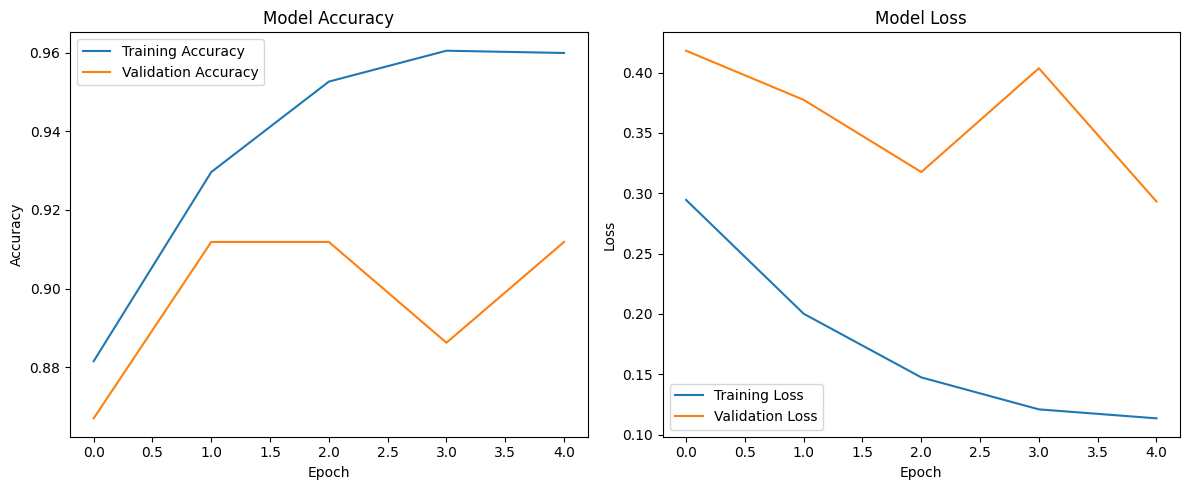

In [16]:
import matplotlib.pyplot as plt

# Extract metrics from training history
history = fitted_model.history

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Step 16:  

Load the model that we created. Now read an image and preprocess the image finally we check what output our model is giving using model.predict() function.

In [18]:
from keras.preprocessing import image
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
import numpy as np

# Load the saved model
model = load_model('our_model.h5')

# Load and preprocess the input image
img_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person151_bacteria_718.jpeg'
img = image.load_img(img_path, target_size=(224, 224))

# Convert image to array and preprocess
imagee = image.img_to_array(img)
imagee = np.expand_dims(imagee, axis=0)
image_data = preprocess_input(imagee)

# Make prediction
prediction = model.predict(image_data)

# Display classification result
predicted_class = np.argmax(prediction[0])  # index of highest probability

# Optional: Use class indices from training generator
class_labels = list(training_set.class_indices.keys())

print(f'Prediction probabilities: {prediction}')
print(f'Predicted class: {class_labels[predicted_class]}')

if class_labels[predicted_class] == 'NORMAL':
    print('✅ Person is safe.')
else:
    print('⚠️ Person is affected with PNEUMONIA.')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction probabilities: [[0. 1.]]
Predicted class: PNEUMONIA
⚠️ Person is affected with PNEUMONIA.
